<a href="https://colab.research.google.com/github/MUbarak123-56/qiskit-work/blob/master/quantum-protocols-algos/quantum_counting.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
!pip install -q qiskit

  Installing build dependencies ... done
  Getting requirements to build wheel ... done
  Installing backend dependencies ... done
  Preparing metadata (pyproject.toml) ... done
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 6.0/6.0 MB 50.0 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 12.8/12.8 MB 100.9 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 241.5/241.5 kB 26.8 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 129.9/129.9 kB 17.0 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 1.9/1.9 MB 96.6 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 49.6/49.6 kB 5.7 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 110.5/110.5 kB 13.8 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 49.6/49.6 kB 6.0 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 37.5/37.5 MB 19.4 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 112.7/112.7 kB 13.0 MB/s eta 0:00:00


In [2]:
!pip install -q pylatexenc

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 162.6/162.6 kB 3.3 MB/s eta 0:00:00
  Preparing metadata (setup.py) ... done


In [3]:
!pip install git+https://github.com/qiskit-community/qiskit-textbook.git#subdirectory=qiskit-textbook-src

  Cloning https://github.com/qiskit-community/qiskit-textbook.git to /tmp/pip-req-build-7ipd6lg0
  Running command git clone --filter=blob:none --quiet https://github.com/qiskit-community/qiskit-textbook.git /tmp/pip-req-build-7ipd6lg0
  Resolved https://github.com/qiskit-community/qiskit-textbook.git to commit 0ae905083ec3872d7ddc6bb4001d5468f476d93f
  Preparing metadata (setup.py) ... done
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 1.6/1.6 MB 27.2 MB/s eta 0:00:00
  Created wheel for qiskit-textbook: filename=qiskit_textbook-0.1.0-py3-none-any.whl size=17522 sha256=a89f266a1a89274471c2e66dc1bc0a593d5d752e8bc749d651c9759c71623462
  Stored in directory: /tmp/pip-ephem-wheel-cache-diqd90lh/wheels/a4/af/1e/358474758f89b7223d73e3a3b05d32a15554fede054868448c
Successfully built qiskit-textbook


In [4]:
import numpy as np
from qiskit import QuantumCircuit, QuantumRegister, ClassicalRegister, execute, Aer, IBMQ, transpile
from qiskit.visualization import plot_histogram
from qiskit.providers.ibmq import least_busy
from qiskit.tools.jupyter import *
from qiskit_textbook.tools import simon_oracle
import matplotlib.pyplot as plt
import math

# importing Qiskit
import qiskit
from qiskit import QuantumCircuit, transpile, Aer

# import basic plot tools
from qiskit.visualization import plot_histogram

In [41]:
def grover_operator(n_iterations):
    """Grover iteration circuit for oracle with 5/16 solutions
        Args:
            n_iterations (int): number of times to repeat the circuit
        Returns:
            Gate that implements n_iterations of the Grover operator
    """
    from qiskit.circuit.library import Diagonal, GroverOperator
    oracle = Diagonal([1,1,-1,1,1,1,1,1,1,1,1,-1,1,1,-1,1])
    grover_it = GroverOperator(oracle).repeat(n_iterations).to_gate()
    grover_it.label = f"Grover$^{n_iterations}$"
    return grover_it

In [42]:
from qiskit.circuit.library import QFT
qft_dagger = QFT(4, inverse = True).to_gate()
qft_dagger.label = "QFT†"

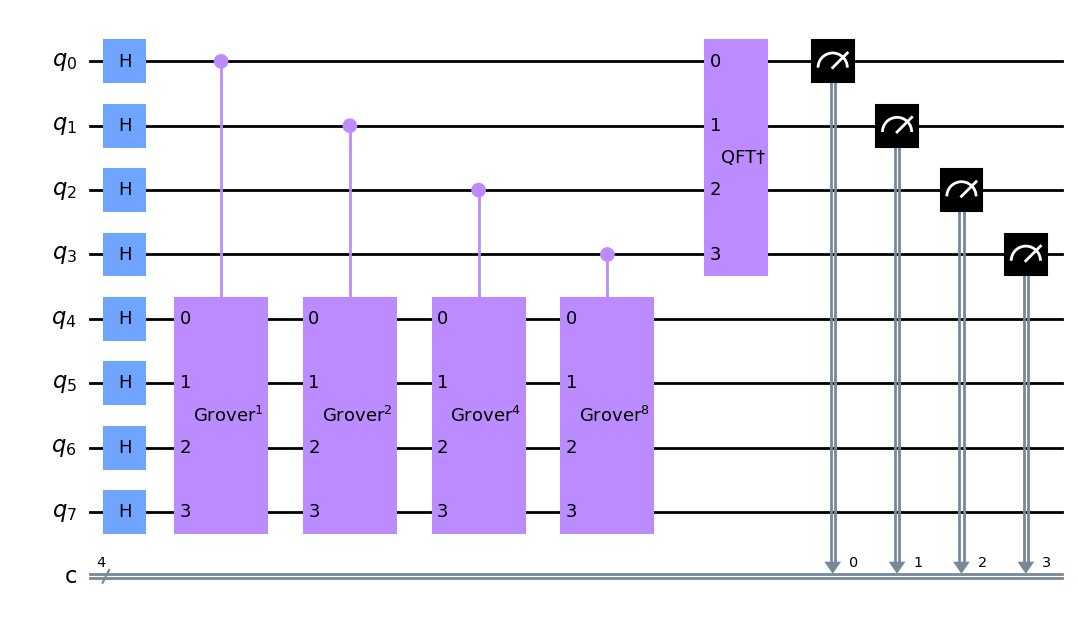

In [43]:
t = 4
n = 4
qc = QuantumCircuit(n + t, t)

for qubit in range(t + n):
  qc.h(qubit)

n_iterations = 1
for qubit in range(t):
  c_grit = grover_operator(n_iterations).control()
  qc.append(c_grit, [qubit] + list(range(t, t + n)))
  n_iterations *= 2

qc.append(qft_dagger, range(t))

qc.measure(range(t), range(t))
qc.draw("mpl")

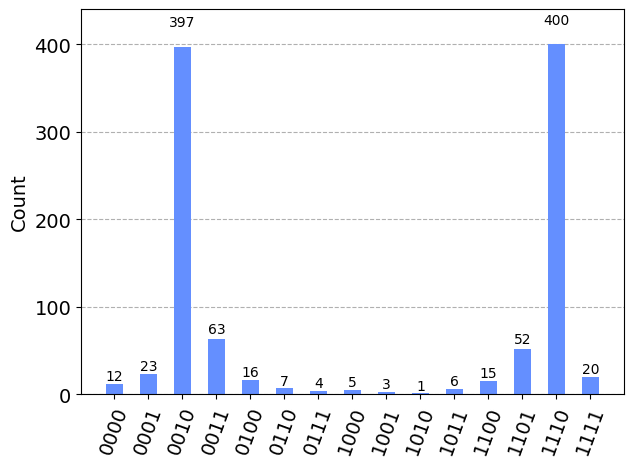

In [44]:
backend = Aer.get_backend("qasm_simulator")
transpiled_qc = transpile(qc, backend)
job = execute(transpiled_qc, backend, shots = 1024)
result = job.result()
counts = result.get_counts()
plot_histogram(counts)

In [45]:
measured_str = max(counts, key=counts.get)

In [46]:
measured_str

'1110'

In [47]:
measured_int = int(measured_str, 2)
print("Register Output = %i" % measured_int)

Register Output = 14


In [48]:
theta = (measured_int/(2**t))*math.pi*2
print(theta)


5.497787143782138


In [49]:
N = 2**n

M = N * (math.sin(theta/2)**2)
print("Number of solutions: %.2f"%M)

Number of solutions: 2.34


In [50]:
m = t - 1 # Upper bound: Will be less than this
err = (math.sqrt(2*M*N) + N/(2**(m+1)))*(2**(-m))
print("Error < %.2f" % err)

Error < 1.21


In [51]:
def calculate_M(measured_int, t, n):
    """For Processing Output of Quantum Counting"""
    # Calculate Theta
    theta = (measured_int/(2**t))*math.pi*2
    print("Theta = %.5f" % theta)
    # Calculate No. of Solutions
    N = 2**n
    M = N * (math.sin(theta/2)**2)
    print(f"No. of Solutions = {M:.1f}")
    # Calculate Upper Error Bound
    m = t - 1 #Will be less than this (out of scope)
    err = (math.sqrt(2*M*N) + N/(2**(m+1)))*(2**(-m))
    print("Error < %.2f" % err)